In [36]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, RNN
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
pos_set = np.load("./train/pos_set.npy")
neg_set = np.load("./train/neg_set.npy")

complete = np.concatenate((pos_set, neg_set))
y = np.concatenate((np.ones((pos_set.shape[0],1)), np.zeros((neg_set.shape[0],1))))

scaled_data = []

for trajectory in complete:
    std = StandardScaler()
    scaled_data.append(std.fit_transform(trajectory))

scaled_data = np.asarray(scaled_data)

/opt/conda/envs/torch/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float128 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
scaled_data.shape, y.shape

((1933, 999, 2), (1933, 1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.25, random_state=42)

In [17]:
model = Sequential()
model.add(LSTM(126, input_shape=(999, 2), return_sequences=True, dropout=0.2))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(16, dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 999, 126)          65016     
_________________________________________________________________
lstm_8 (LSTM)                (None, 999, 64)           48896     
_________________________________________________________________
lstm_9 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 119,113
Trainable params: 119,113
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])

In [41]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.3,
                    shuffle=True,
                    callbacks=[ModelCheckpoint("./models_lstm1/weights.{epoch:02d}-{val_loss:.2f}.hdf5")]
                   )

Train on 1014 samples, validate on 435 samples
Epoch 1/10
1014/1014 [==============================] - 68s 67ms/step - loss: 0.1371 - acc: 0.9645 - val_loss: 0.0437 - val_acc: 0.9977
Epoch 2/10
1014/1014 [==============================] - 67s 66ms/step - loss: 0.1347 - acc: 0.9645 - val_loss: 0.0438 - val_acc: 0.9954
Epoch 3/10
1014/1014 [==============================] - 67s 67ms/step - loss: 0.1928 - acc: 0.9310 - val_loss: 0.1147 - val_acc: 0.9379
Epoch 4/10
1014/1014 [==============================] - 68s 67ms/step - loss: 0.2212 - acc: 0.9142 - val_loss: 0.0943 - val_acc: 0.9770
Epoch 5/10
1014/1014 [==============================] - 68s 67ms/step - loss: 0.1615 - acc: 0.9467 - val_loss: 0.1256 - val_acc: 0.9701
Epoch 6/10
1014/1014 [==============================] - 68s 67ms/step - loss: 0.1098 - acc: 0.9655 - val_loss: 0.0526 - val_acc: 0.9977
Epoch 7/10
1014/1014 [==============================] - 67s 67ms/step - loss: 0.1188 - acc: 0.9625 - val_loss: 0.2481 - val_acc: 0.9540
E

In [42]:
model.evaluate(X_test,y_test)

484/484 [==============================] - 5s 11ms/step


[0.040990727638040694, 0.993801652892562]

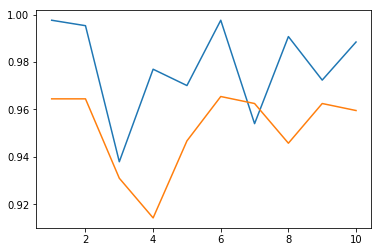

In [43]:
plt.plot(range(1,11),history.history["val_acc"])
plt.plot(range(1,11), history.history["acc"])

In [ ]:
history2 = model.fit(X_train, y_train,
                    epochs=8,
                    validation_split=0.3,
                    shuffle=True
                   )